## Import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os

/Users/macbook/anaconda3/envs/azerty/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/macbook/anaconda3/envs/azerty/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/macbook/anaconda3/envs/azerty/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/macbook/anaconda3/envs/azerty/lib

In [2]:
os.chdir("/Users/macbook/Desktop/Cours_M2GLSI/Traitement_images/Projet")

### Import csv file

#### Description of data
Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.
This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions. Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:
* Normal (N),
* Diabetes (D),
* Glaucoma (G),
* Cataract (C),
* Age related Macular Degeneration (A),
* Hypertension (H),
* Pathological Myopia (M),
* Other diseases/abnormalities (O)


In [3]:
dataFrame = pd.read_csv("./full_df.csv")
dataFrame

ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
0        0           69      Female     0_left.jpg     0_right.jpg   
1        1           57        Male     1_left.jpg     1_right.jpg   
2        2           42        Male     2_left.jpg     2_right.jpg   
3        4           53        Male     4_left.jpg     4_right.jpg   
4        5           50      Female     5_left.jpg     5_right.jpg   
...    ...          ...         ...            ...             ...   
6387  4686           63        Male  4686_left.jpg  4686_right.jpg   
6388  4688           42        Male  4688_left.jpg  4688_right.jpg   
6389  4689           54        Male  4689_left.jpg  4689_right.jpg   
6390  4690           57        Male  4690_left.jpg  4690_right.jpg   
6391  4784           58        Male  4784_left.jpg  4784_right.jpg   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   
6391  hypertensive retinopathy，age-related macular d...   

                              Right-Diagnostic Keywords  N  D  G  C  A  H  M  \
0                                         normal fundus  0  0  0  1  0  0  0   
1                                         normal fundus  1  0  0  0  0  0  0   
2                moderate non proliferative retinopathy  0  1  0  0  0  0  0   
3                     mild nonproliferative retinopathy  0  1  0  0  0  0  0   
4                moderate non proliferative retinopathy  0  1  0  0  0  0  0   
...                                                 ... .. .. .. .. .. .. ..   
6387                 proliferative diabetic retinopathy  0  1  0  0  0  0  0   
6388             moderate non proliferative retinopathy  0  1  0  0  0  0  0   
6389                                      normal fundus  0  1  0  0  0  0  0   
6390                  mild nonproliferative retinopathy  0  1  0  0  0  0  0   
6391  hypertensive retinopathy，age-related macular d...  0  0  0  0  1  1  0   

      O                                           filepath labels  \
0     0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1     0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2     1  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3     1  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4     0  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
...  ..                                                ...    ...   
6387  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6388  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6389  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6390  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6391  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['H']   

                        target       filename  
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg  
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg  
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg  
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg  
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg  
...                        ...            ...  
6387  [0, 1, 0, 0, 0, 0, 0, 0]  4686_left.jpg  
6388  [0, 1, 0, 0, 0, 0, 0, 0]  4688_left.jpg  
6389  [0, 1, 0, 0, 0, 0, 0, 0]  4689_left.jpg  
6390  [0, 1, 0, 0, 0, 0, 0, 0]  4690_left.jpg  
6391  [0, 0, 0, 0, 0, 1, 0, 0]  4784_left.jpg  

[6392 rows x 19 columns]

In [4]:
dataFrame.describe()

ID  Patient Age            N            D            G  \
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000   
mean   2271.150814    57.857947     0.328692     0.332134     0.062109   
std    1417.559018    11.727737     0.469775     0.471016     0.241372   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%     920.750000    51.000000     0.000000     0.000000     0.000000   
50%    2419.500000    59.000000     0.000000     0.000000     0.000000   
75%    3294.000000    66.000000     1.000000     1.000000     0.000000   
max    4784.000000    91.000000     1.000000     1.000000     1.000000   

                 C            A            H            M            O  
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000  
mean      0.062891     0.049906     0.031758     0.047872     0.248436  
std       0.242786     0.217768     0.175370     0.213513     0.432139  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [5]:
dataFrame['N'].value_counts()

0    4291
1    2101
Name: N, dtype: int64

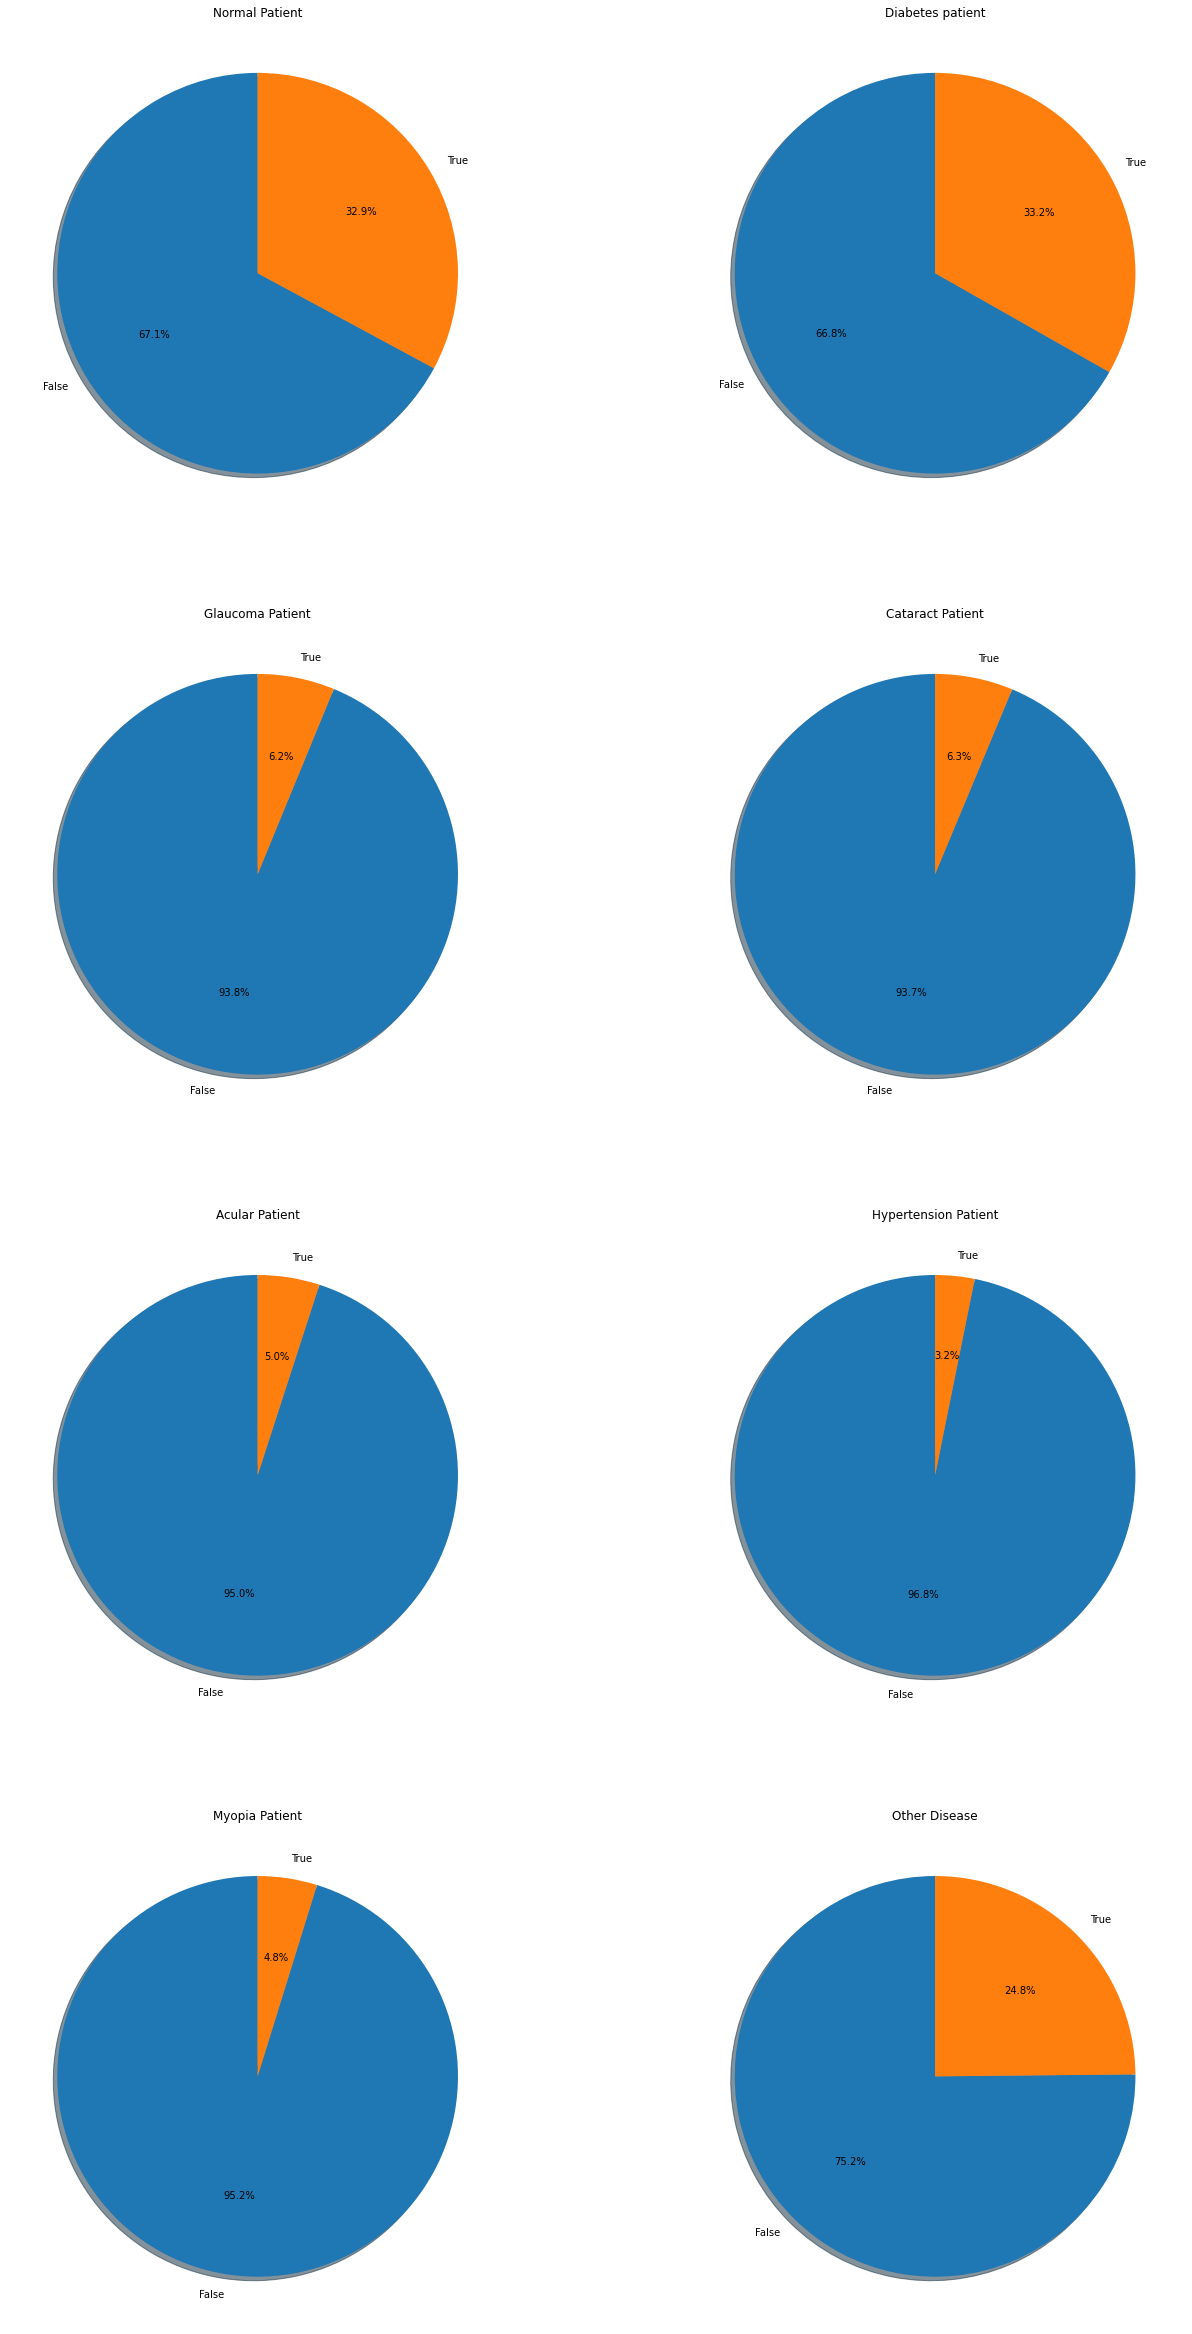

In [6]:
labels = [("Normal Patient", "N"), ("Diabetes patient", "D"), ("Glaucoma Patient", "G"), ("Cataract Patient", "C"), ("Acular Patient", "A"), 
          ("Hypertension Patient", "H"), ("Myopia Patient", "M"), ("Other Disease", "O")]

for i,label in zip(range(1,9), labels):
    plt.subplot(4,2,i)
    plt.pie(dataFrame[label[1]].value_counts(), labels=["False", "True"], autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(label[0])
plt.subplots_adjust(bottom=2, right=3, top=10)
plt.show()

In [7]:
# In our case, we need to choice diabetes patients and normal patients
# Therefore we delete other types of disease 

In [8]:
dataFrame = dataFrame.drop(labels=["O", "M", "G", "C", "H", "A"], axis=1)
dataFrame

ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
0        0           69      Female     0_left.jpg     0_right.jpg   
1        1           57        Male     1_left.jpg     1_right.jpg   
2        2           42        Male     2_left.jpg     2_right.jpg   
3        4           53        Male     4_left.jpg     4_right.jpg   
4        5           50      Female     5_left.jpg     5_right.jpg   
...    ...          ...         ...            ...             ...   
6387  4686           63        Male  4686_left.jpg  4686_right.jpg   
6388  4688           42        Male  4688_left.jpg  4688_right.jpg   
6389  4689           54        Male  4689_left.jpg  4689_right.jpg   
6390  4690           57        Male  4690_left.jpg  4690_right.jpg   
6391  4784           58        Male  4784_left.jpg  4784_right.jpg   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   
6391  hypertensive retinopathy，age-related macular d...   

                              Right-Diagnostic Keywords  N  D  \
0                                         normal fundus  0  0   
1                                         normal fundus  1  0   
2                moderate non proliferative retinopathy  0  1   
3                     mild nonproliferative retinopathy  0  1   
4                moderate non proliferative retinopathy  0  1   
...                                                 ... .. ..   
6387                 proliferative diabetic retinopathy  0  1   
6388             moderate non proliferative retinopathy  0  1   
6389                                      normal fundus  0  1   
6390                  mild nonproliferative retinopathy  0  1   
6391  hypertensive retinopathy，age-related macular d...  0  0   

                                               filepath labels  \
0     ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1     ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
...                                                 ...    ...   
6387  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6388  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6389  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6390  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6391  ../input/ocular-disease-recognition-odir5k/ODI...  ['H']   

                        target       filename  
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg  
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg  
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg  
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg  
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg  
...                        ...            ...  
6387  [0, 1, 0, 0, 0, 0, 0, 0]  4686_left.jpg  
6388  [0, 1, 0, 0, 0, 0, 0, 0]  4688_left.jpg  
6389  [0, 1, 0, 0, 0, 0, 0, 0]  4689_left.jpg  
6390  [0, 1, 0, 0, 0, 0, 0, 0]  4690_left.jpg  
6391  [0, 0, 0, 0, 0, 1, 0, 0]  4784_left.jpg  

[6392 rows x 13 columns]

In [9]:
# Also we delete all of row not corresponding to Normal patient and Diabetes patients
dataFrame = dataFrame[dataFrame["labels"].str.contains("[O]|[M]|[G]|[C]|[H]|[A]")==False]
dataFrame

ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
0        0           69      Female     0_left.jpg     0_right.jpg   
1        1           57        Male     1_left.jpg     1_right.jpg   
2        2           42        Male     2_left.jpg     2_right.jpg   
3        4           53        Male     4_left.jpg     4_right.jpg   
4        5           50      Female     5_left.jpg     5_right.jpg   
...    ...          ...         ...            ...             ...   
6386  4683           58        Male  4683_left.jpg  4683_right.jpg   
6387  4686           63        Male  4686_left.jpg  4686_right.jpg   
6388  4688           42        Male  4688_left.jpg  4688_right.jpg   
6389  4689           54        Male  4689_left.jpg  4689_right.jpg   
6390  4690           57        Male  4690_left.jpg  4690_right.jpg   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6386                                      normal fundus   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   

                   Right-Diagnostic Keywords  N  D  \
0                              normal fundus  0  0   
1                              normal fundus  1  0   
2     moderate non proliferative retinopathy  0  1   
3          mild nonproliferative retinopathy  0  1   
4     moderate non proliferative retinopathy  0  1   
...                                      ... .. ..   
6386       mild nonproliferative retinopathy  0  1   
6387      proliferative diabetic retinopathy  0  1   
6388  moderate non proliferative retinopathy  0  1   
6389                           normal fundus  0  1   
6390       mild nonproliferative retinopathy  0  1   

                                               filepath labels  \
0     ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1     ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
...                                                 ...    ...   
6386  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
6387  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6388  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6389  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6390  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

                        target       filename  
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg  
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg  
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg  
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg  
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg  
...                        ...            ...  
6386  [1, 0, 0, 0, 0, 0, 0, 0]  4683_left.jpg  
6387  [0, 1, 0, 0, 0, 0, 0, 0]  4686_left.jpg  
6388  [0, 1, 0, 0, 0, 0, 0, 0]  4688_left.jpg  
6389  [0, 1, 0, 0, 0, 0, 0, 0]  4689_left.jpg  
6390  [0, 1, 0, 0, 0, 0, 0, 0]  4690_left.jpg  

[4481 rows x 13 columns]

In [10]:
print ("Now the dataframe has {} rows and {} columns".format(dataFrame.index.values.size,dataFrame.columns.values.size))

Now the dataframe has 4481 rows and 13 columns


In [11]:
import os
import shutil

In [12]:
# Now let's working with images
# Firstly we change the name of filepath

# We copy all of images in some specific folder
destination = "/Users/macbook/Desktop/Cours_M2GLSI/Traitement_images/Projet/Images"
src = ["/Users/macbook/Downloads/ODIR-5K/Testing_Images/", "/Users/macbook/Downloads/ODIR-5K/Training_Images/" ]
if not os.path.exists(destination):
    os.makedirs(destination)
for folder in src:
    os.chdir(folder)
    for file in np.array(dataFrame['filename']):
        if os.path.isfile(file):
            shutil.copy(file, destination)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/macbook/Downloads/ODIR-5K/Testing_Images/'

In [ ]:
number_of_files = len(os.listdir(destination))
print(number_of_files)

In [13]:
# Alright, all of files is copied to the destination file
# Now delete filepath labels and target
dataFrame = dataFrame.drop(['filepath', 'target'], axis=1)
dataFrame

ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
0        0           69      Female     0_left.jpg     0_right.jpg   
1        1           57        Male     1_left.jpg     1_right.jpg   
2        2           42        Male     2_left.jpg     2_right.jpg   
3        4           53        Male     4_left.jpg     4_right.jpg   
4        5           50      Female     5_left.jpg     5_right.jpg   
...    ...          ...         ...            ...             ...   
6386  4683           58        Male  4683_left.jpg  4683_right.jpg   
6387  4686           63        Male  4686_left.jpg  4686_right.jpg   
6388  4688           42        Male  4688_left.jpg  4688_right.jpg   
6389  4689           54        Male  4689_left.jpg  4689_right.jpg   
6390  4690           57        Male  4690_left.jpg  4690_right.jpg   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6386                                      normal fundus   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   

                   Right-Diagnostic Keywords  N  D labels       filename  
0                              normal fundus  0  0  ['N']    0_right.jpg  
1                              normal fundus  1  0  ['N']    1_right.jpg  
2     moderate non proliferative retinopathy  0  1  ['D']    2_right.jpg  
3          mild nonproliferative retinopathy  0  1  ['D']    4_right.jpg  
4     moderate non proliferative retinopathy  0  1  ['D']    5_right.jpg  
...                                      ... .. ..    ...            ...  
6386       mild nonproliferative retinopathy  0  1  ['N']  4683_left.jpg  
6387      proliferative diabetic retinopathy  0  1  ['D']  4686_left.jpg  
6388  moderate non proliferative retinopathy  0  1  ['D']  4688_left.jpg  
6389                           normal fundus  0  1  ['D']  4689_left.jpg  
6390       mild nonproliferative retinopathy  0  1  ['D']  4690_left.jpg  

[4481 rows x 11 columns]

In [14]:
print(dataFrame.index.size)

4481


In [15]:
dataFrame = dataFrame.drop(["ID", "Left-Fundus", "Right-Fundus"], axis=1)

In [57]:
dataFrame.to_csv('/Users/macbook/Desktop/Cours_M2GLSI/Traitement_images/Projet/csv_preprocessing.csv',index=False, header=True )

In [58]:
df = pd.read_csv('csv_preprocessing.csv')

In [59]:
df

Patient Age Patient Sex  \
0              69      Female   
1              57        Male   
2              42        Male   
3              53        Male   
4              50      Female   
...           ...         ...   
4476           58        Male   
4477           63        Male   
4478           42        Male   
4479           54        Male   
4480           57        Male   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
4476                                      normal fundus   
4477                severe nonproliferative retinopathy   
4478             moderate non proliferative retinopathy   
4479                  mild nonproliferative retinopathy   
4480                  mild nonproliferative retinopathy   

                   Right-Diagnostic Keywords  N  D labels       filename  
0                              normal fundus  0  0  ['N']    0_right.jpg  
1                              normal fundus  1  0  ['N']    1_right.jpg  
2     moderate non proliferative retinopathy  0  1  ['D']    2_right.jpg  
3          mild nonproliferative retinopathy  0  1  ['D']    4_right.jpg  
4     moderate non proliferative retinopathy  0  1  ['D']    5_right.jpg  
...                                      ... .. ..    ...            ...  
4476       mild nonproliferative retinopathy  0  1  ['N']  4683_left.jpg  
4477      proliferative diabetic retinopathy  0  1  ['D']  4686_left.jpg  
4478  moderate non proliferative retinopathy  0  1  ['D']  4688_left.jpg  
4479                           normal fundus  0  1  ['D']  4689_left.jpg  
4480       mild nonproliferative retinopathy  0  1  ['D']  4690_left.jpg  

[4481 rows x 8 columns]

In [19]:
import cv2
import matplotlib.image as mpimg

In [20]:
print(os.getcwd())

/Users/macbook/Desktop/Cours_M2GLSI/Traitement_images/Projet


In [21]:
def labels(name):
    return name.replace('[', '').replace(']','').replace('\'','')

In [22]:
df['labels'] = df['labels'].apply(labels)

In [23]:
df

Patient Age Patient Sex  \
0              69      Female   
1              57        Male   
2              42        Male   
3              53        Male   
4              50      Female   
...           ...         ...   
4476           58        Male   
4477           63        Male   
4478           42        Male   
4479           54        Male   
4480           57        Male   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
4476                                      normal fundus   
4477                severe nonproliferative retinopathy   
4478             moderate non proliferative retinopathy   
4479                  mild nonproliferative retinopathy   
4480                  mild nonproliferative retinopathy   

                   Right-Diagnostic Keywords  N  D labels       filename  
0                              normal fundus  0  0      N    0_right.jpg  
1                              normal fundus  1  0      N    1_right.jpg  
2     moderate non proliferative retinopathy  0  1      D    2_right.jpg  
3          mild nonproliferative retinopathy  0  1      D    4_right.jpg  
4     moderate non proliferative retinopathy  0  1      D    5_right.jpg  
...                                      ... .. ..    ...            ...  
4476       mild nonproliferative retinopathy  0  1      N  4683_left.jpg  
4477      proliferative diabetic retinopathy  0  1      D  4686_left.jpg  
4478  moderate non proliferative retinopathy  0  1      D  4688_left.jpg  
4479                           normal fundus  0  1      D  4689_left.jpg  
4480       mild nonproliferative retinopathy  0  1      D  4690_left.jpg  

[4481 rows x 8 columns]

In [24]:
df['labels'].value_counts()

N    2873
D    1608
Name: labels, dtype: int64

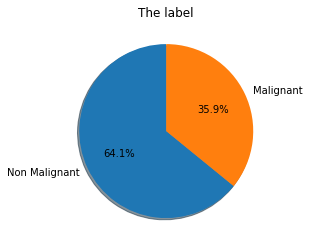

In [25]:
plt.pie(df['labels'].value_counts(), labels=["Non Malignant", "Malignant"], autopct='%1.1f%%',
            shadow=True, startangle=90)
plt.title("The label")
plt.show()

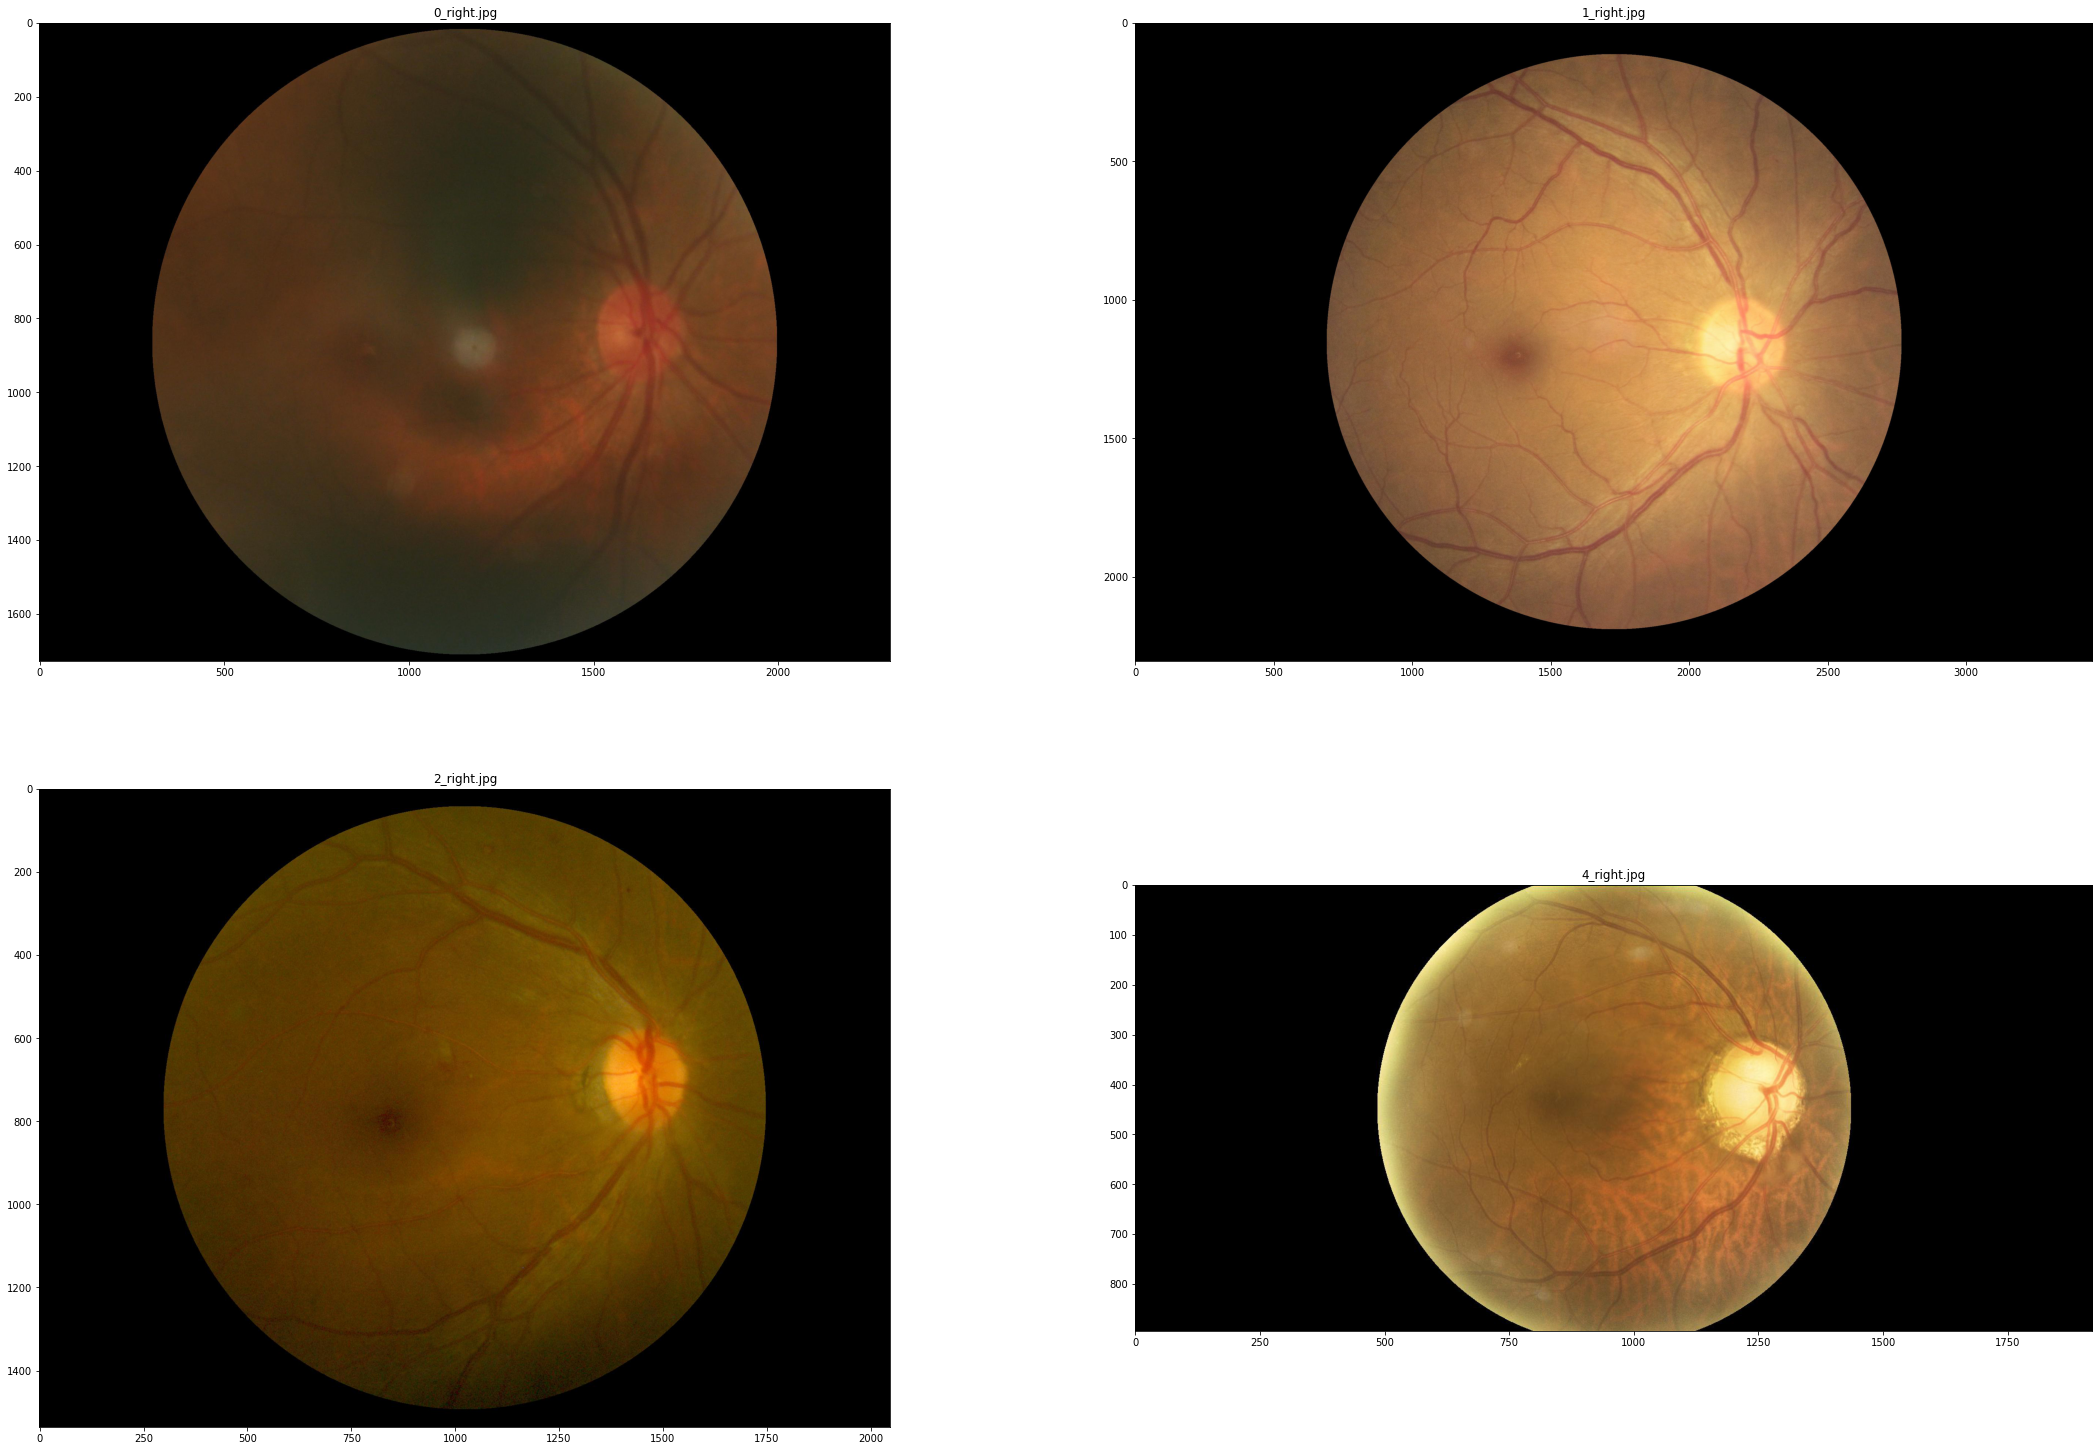

In [26]:
images = np.array(df['filename'])
for i,file in zip(range(1,5),images):
    plt.subplot(2,2,i)
    img = plt.imread('./Images/{}'.format(file))
    plt.imshow(img)
    plt.title(file)
plt.subplots_adjust(right=5, top=5)
plt.show()

In [27]:
def transform_img(img_name, img_width=1728, img_height=1728):

    # read an image
    image = cv2.imread('./Images/{}'.format(img_name), 0)
    
     #Histogram Equalization
    img = cv2.equalizeHist(image)

    #Image Resizing
    img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
    
    
    return image, img

In [28]:
image, img = transform_img(img_name="0_right.jpg")

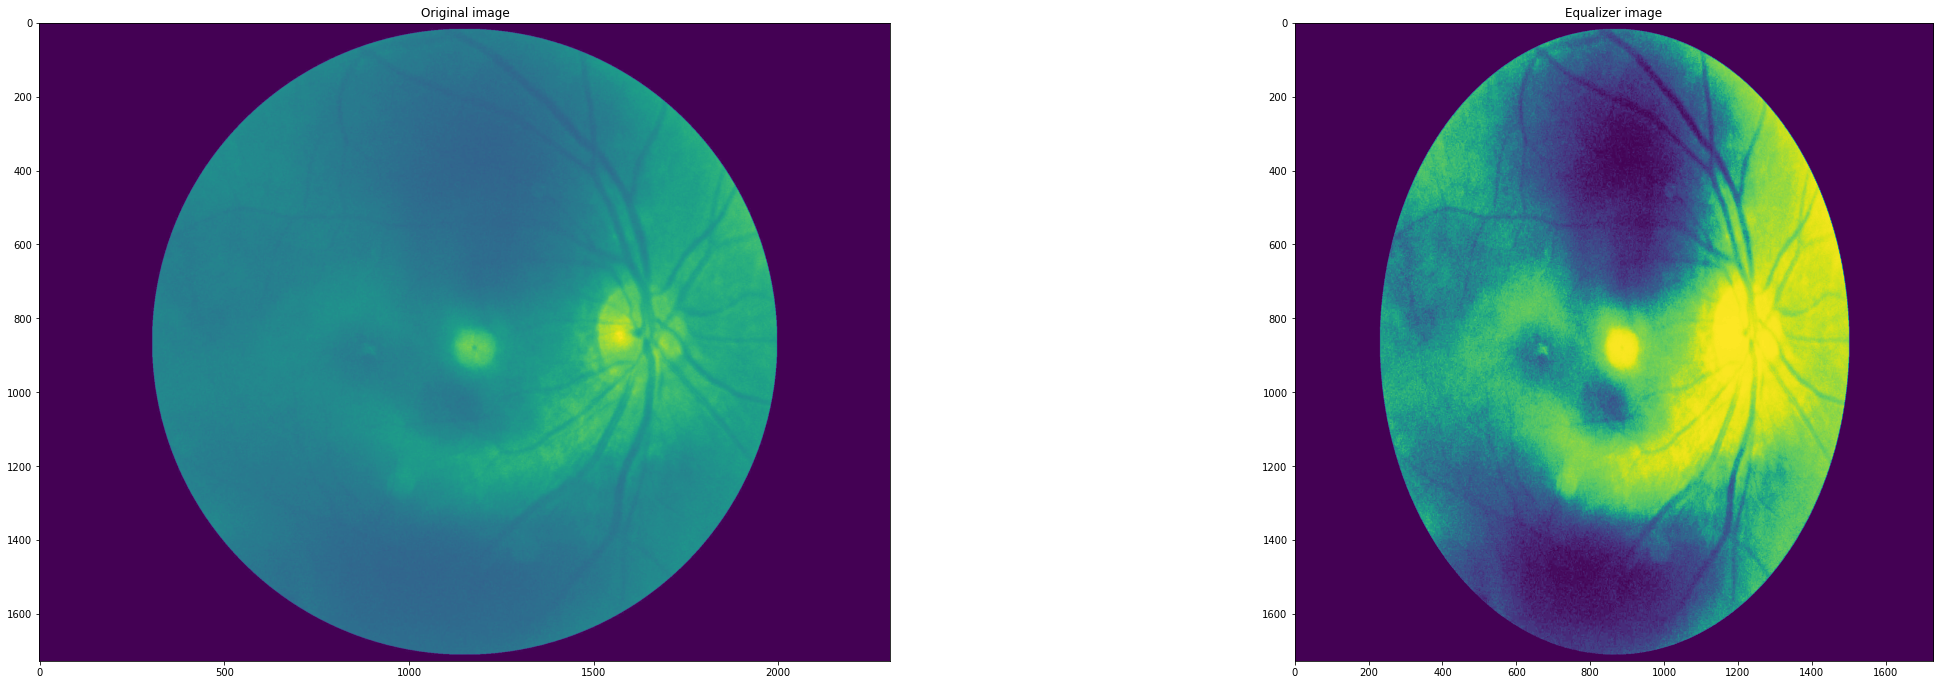

In [29]:
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(2,2,2)
plt.imshow(img)
plt.title("Equalizer image")

plt.subplots_adjust(right=5, top=5)
plt.show()

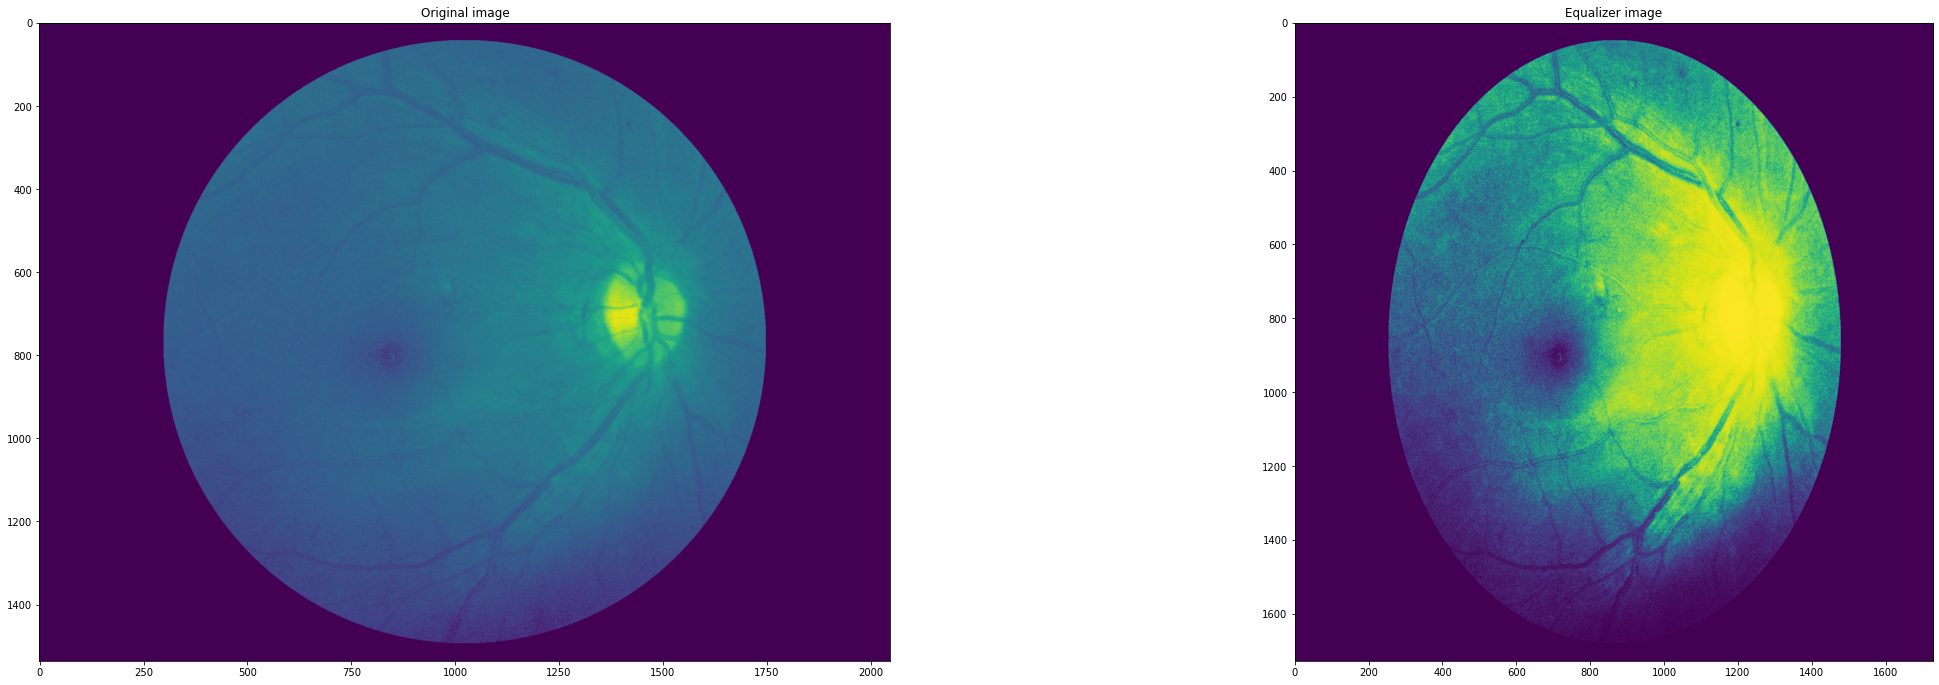

In [30]:
image, img = transform_img(img_name="2_right.jpg")
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(2,2,2)
plt.imshow(img)
plt.title("Equalizer image")

plt.subplots_adjust(right=5, top=5)
plt.show()

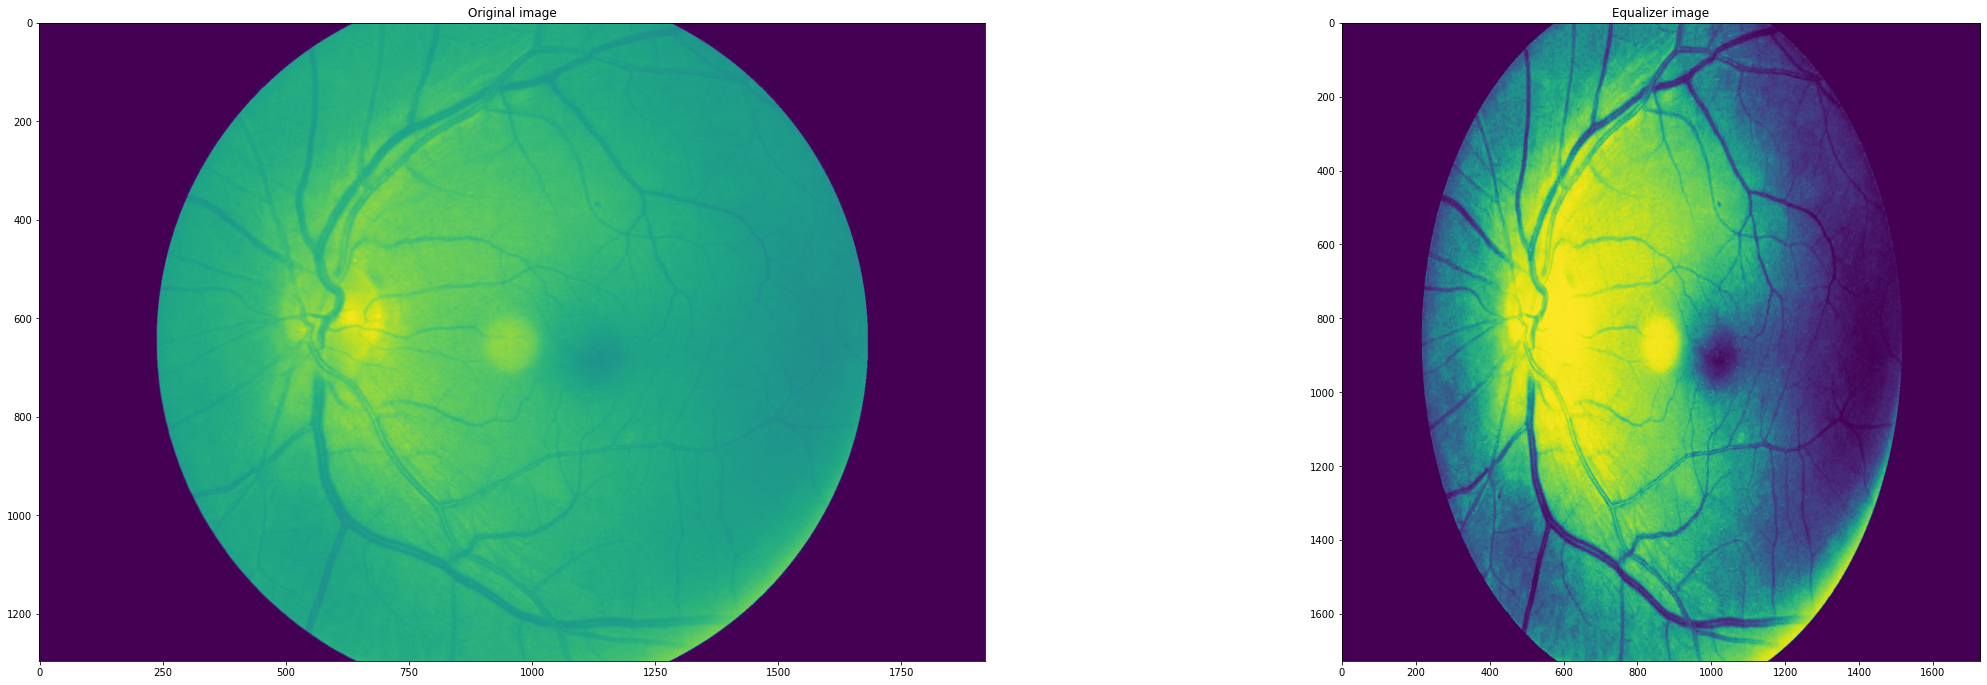

In [31]:
image, img = transform_img(img_name="4690_left.jpg")
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(2,2,2)
plt.imshow(img)
plt.title("Equalizer image")

plt.subplots_adjust(right=5, top=5)
plt.show()

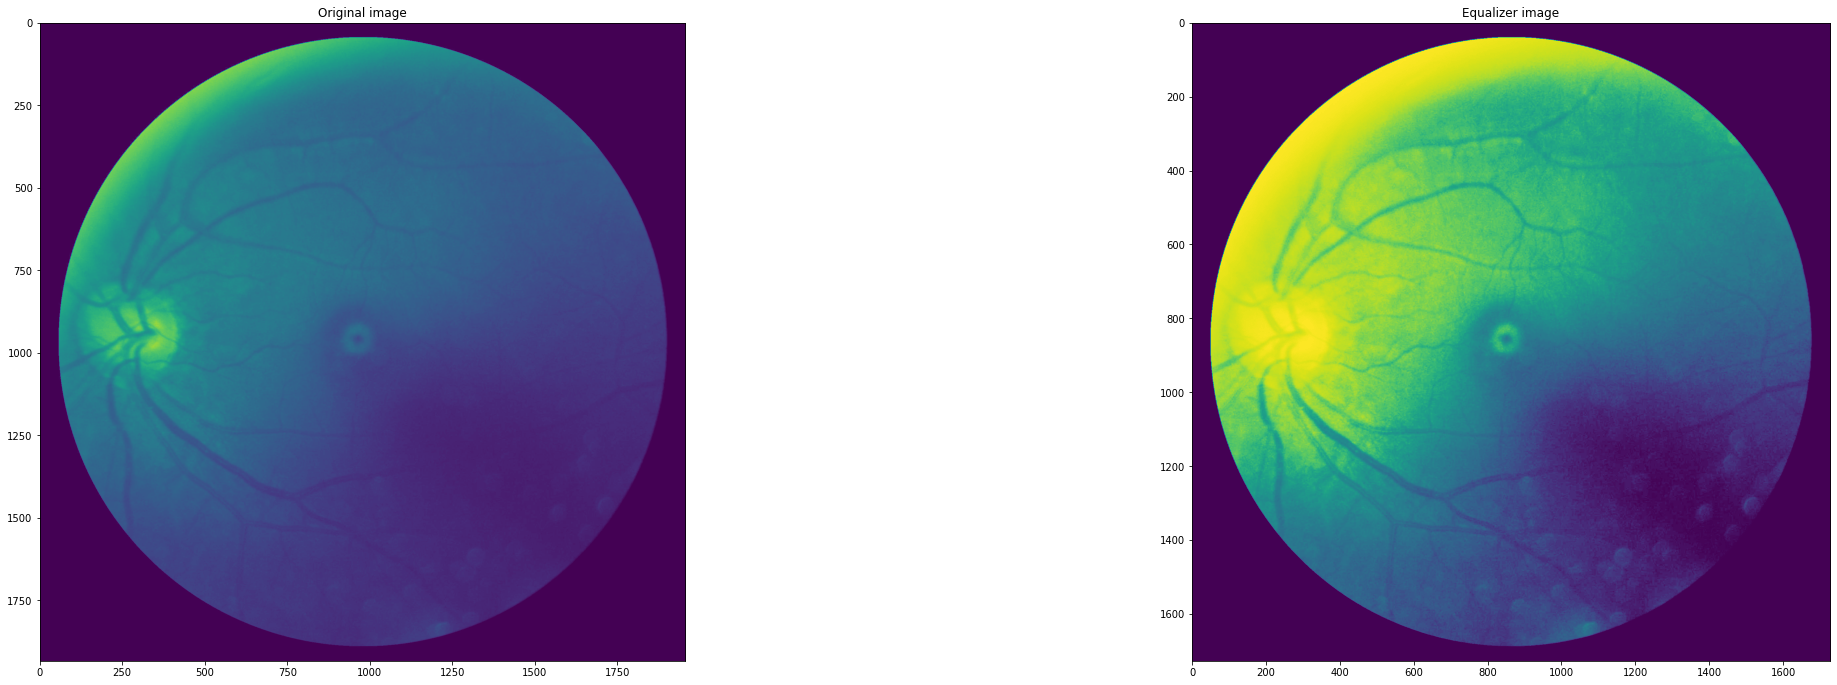

In [32]:
image, img = transform_img(img_name="4683_left.jpg")
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(2,2,2)
plt.imshow(img)
plt.title("Equalizer image")

plt.subplots_adjust(right=5, top=5)
plt.show()

### Let's transform all of images to and dataframe

In [33]:
df.head()

Patient Age Patient Sex                           Left-Diagnostic Keywords  \
0           69      Female                                           cataract   
1           57        Male                                      normal fundus   
2           42        Male  laser spot，moderate non proliferative retinopathy   
3           53        Male                        macular epiretinal membrane   
4           50      Female             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D labels     filename  
0                           normal fundus  0  0      N  0_right.jpg  
1                           normal fundus  1  0      N  1_right.jpg  
2  moderate non proliferative retinopathy  0  1      D  2_right.jpg  
3       mild nonproliferative retinopathy  0  1      D  4_right.jpg  
4  moderate non proliferative retinopathy  0  1      D  5_right.jpg

In [34]:
filename = df['filename'][0]
print(filename)
img = cv2.imread("./Images/{}".format(filename), 0)# Gray image
print(img)

0_right.jpg
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Create a function who transorm all of images and resize to 128*128

In [56]:
def proc_images(images, labels, channel=None):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 128
    HEIGHT = 128

    for img, label in zip(images, labels):

        # Read and resize image
        if channel==None:
            full_size_image = cv2.imread('./Images/{}'.format(img)) #(img, 0) if we need a gray picture 
        else:
            full_size_image = cv2.imread('./Images/{}'.format(img),channel) #(img, 0) if we need a gray picture 
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        
        #Add labels
        y.append(label)
    return x,y

In [53]:
print("size of images is {} and size of label is {}".format(len(df['filename']), len(df['labels'])))

size of images is 4481 and size of label is 4481


In [37]:
x, y = proc_images(df['filename'].to_list(), df['labels'].to_list(), 0)

In [38]:
df['filename'] = x
df['labels'] = y

In [39]:
dataframe = pd.DataFrame()

In [40]:
dataframe = df.filter(['filename', 'labels'], axis=1) # We choice only image and the label

In [41]:
dataframe.head()

filename labels
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      N
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      N
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      D
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      D
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      D

In [42]:
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

In [43]:
dataframe['filename'] = dataframe['filename'].apply(normalize_2d)

In [44]:
print("Shape of first image = {}".format(df['filename'][0].shape))

Shape of first image = (128, 128)


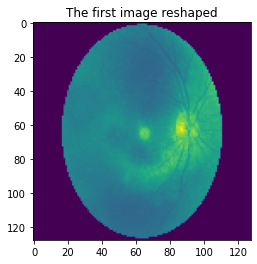

In [45]:
plt.imshow(df['filename'][0])
plt.title("The first image reshaped")
plt.show()

In [46]:
# Construct a model

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
import keras

Using TensorFlow backend.


In [437]:
input_shape = (128,128)

In [438]:
input_shape

(128, 128)

In [439]:
model = Sequential()
model.add(Conv1D(600, kernel_size=3, activation='relu', input_shape=input_shape, name="dense"))
model.add(BatchNormalization())
model.add(Conv1D(400, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(300, kernel_size=3, activation='relu', name="dense2"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv1D(200, kernel_size=3, activation='relu', name="dense3"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(100, activation='relu', name="dense4"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(90, activation='relu', name="dense5"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax', name="dense_output"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [440]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Conv1D)               (None, 126, 600)          231000    
_________________________________________________________________
batch_normalization_121 (Bat (None, 126, 600)          2400      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 124, 400)          720400    
_________________________________________________________________
batch_normalization_122 (Bat (None, 124, 400)          1600      
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 62, 400)           0         
_________________________________________________________________
dropout_101 (Dropout)        (None, 62, 400)           0         
_________________________________________________________________
dense2 (Conv1D)              (None, 60, 300)         

In [463]:
print(model.metrics_names)

['loss', 'acc']


In [441]:
from sklearn.model_selection import train_test_split

In [442]:
X_train, X_test, y_train, y_test = train_test_split(dataframe['filename'], dataframe['labels'], random_state=42, test_size=0.3)

In [443]:
PREDICT_CLASSES = 2

In [505]:
from sklearn.preprocessing import LabelEncoder

In [445]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)

In [446]:
y_train

array([1, 1, 0, ..., 1, 1, 1])

In [447]:
y_train = np.eye(PREDICT_CLASSES)[y_train.astype(int)] # PREDICT_CLASSES = 62
print(y_train.shape)

(3136, 2)


In [448]:
le = LabelEncoder()

y_test = le.fit_transform(y_test)

In [449]:
y_test = np.eye(PREDICT_CLASSES)[y_test.astype(int)] # PREDICT_CLASSES = 62
print(y_test.shape)

(1345, 2)


In [450]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [451]:
print("Shape of images",X_train[0].shape)

Shape of images (128, 128)


In [452]:
print(X_train.shape)

(3136,)


### Transform X_train to 3rd dimensions

In [453]:
X_train = np.asarray(X_train.to_list())

X_test = np.asarray(X_test.to_list())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3136, 128, 128) (3136, 2)
(1345, 128, 128) (1345, 2)


In [454]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=True, validation_split=0.3)

Train on 2195 samples, validate on 941 samples
Epoch 1/20
2195/2195 [==============================] - 19s 9ms/step - loss: 1.0556 - acc: 0.5513 - val_loss: 1.4375 - val_acc: 0.5622
Epoch 2/20
2195/2195 [==============================] - 14s 7ms/step - loss: 0.9187 - acc: 0.5554 - val_loss: 0.6489 - val_acc: 0.6504
Epoch 3/20
2195/2195 [==============================] - 15s 7ms/step - loss: 0.8567 - acc: 0.5677 - val_loss: 0.6977 - val_acc: 0.5802
Epoch 4/20
2195/2195 [==============================] - 15s 7ms/step - loss: 0.7565 - acc: 0.6036 - val_loss: 0.6852 - val_acc: 0.5972
Epoch 5/20
2195/2195 [==============================] - 15s 7ms/step - loss: 0.7606 - acc: 0.5795 - val_loss: 0.6586 - val_acc: 0.6397
Epoch 6/20
2195/2195 [==============================] - 15s 7ms/step - loss: 0.7066 - acc: 0.5900 - val_loss: 0.6578 - val_acc: 0.6227
Epoch 7/20
2195/2195 [==============================] - 15s 7ms/step - loss: 0.6951 - acc: 0.5982 - val_loss: 0.6452 - val_acc: 0.6323
Epoch 8/

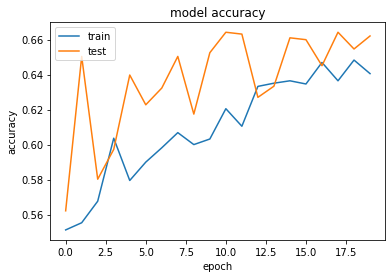

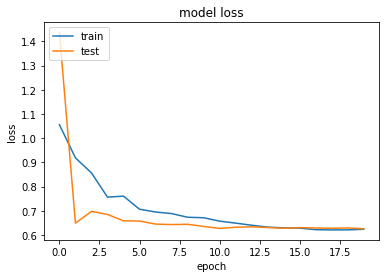

In [455]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [460]:
scores = model.evaluate(X_test, y_test, batch_size=64, verbose=0)

In [471]:
print("The loss is {:.2%} and the accuracy was {:.2%}".format(scores[0], scores[1]))

The loss is 62.79% and the accuracy was 64.98%


## DATA AUGMENTATION

In [76]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

In [60]:
x, y = proc_images(df['filename'].to_list(), df['labels'].to_list(), channel=None)

In [61]:
df3d = pd.DataFrame()

In [62]:
df3d['filename'] = x
df3d['label'] = y

In [63]:
df3d.head()

filename  label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ['N']
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ['N']
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ['D']
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ['D']
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ['D']

In [64]:
df3d['filename'] = df3d['filename'].apply(normalize_2d)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3d['filename'], df3d['label'], 
                                                    test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)

In [68]:
le = LabelEncoder()

y_test = le.fit_transform(y_test)

In [70]:
y_train = np.eye(2)[y_train.astype(int)] # PREDICT_CLASSES = 62
print(y_train.shape)

(3584, 2)


In [71]:
y_test = np.eye(2)[y_test.astype(int)] # PREDICT_CLASSES = 62
print(y_test.shape)

(897, 2)


In [72]:
X_train = np.asarray(X_train.to_list())
X_test = np.asarray(X_test.to_list())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3584, 128, 128, 3) (3584, 2)
(897, 128, 128, 3) (897, 2)


In [73]:
#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

In [74]:
input_shape = (128,128,3)

In [514]:
model = Sequential([
  Convolution2D(filters=128, kernel_size=(5,5), input_shape=input_shape, activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D((2,2)),
  Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D((2,2)),
  Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPool2D((2,2)),
  Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
  BatchNormalization(),
  Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
  BatchNormalization(),
  Flatten(),
  Dense(units=300, activation="relu"),
  Dropout(0.15),
  Dense(units=100, activation="relu"),
  Dropout(0.05),
  Dense(units=2, activation="softmax")
])
optim = RMSprop(lr=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [518]:
train_generator = datagen.flow(X_train, y_train)

In [ ]:
history = model.fit_generator(train_generator,epochs=10,steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 120s 12s/step - loss: 0.9653 - acc: 0.6031
Epoch 2/10
10/10 [==============================] - 112s 11s/step - loss: 0.8889 - acc: 0.5500
Epoch 3/10
10/10 [==============================] - 119s 12s/step - loss: 0.8770 - acc: 0.5688
Epoch 4/10
10/10 [==============================] - 128s 13s/step - loss: 0.7427 - acc: 0.6187
Epoch 5/10
10/10 [==============================] - 125s 12s/step - loss: 0.7607 - acc: 0.6125
Epoch 6/10
10/10 [==============================] - 121s 12s/step - loss: 0.7398 - acc: 0.6219
Epoch 7/10
10/10 [==============================] - 122s 12s/step - loss: 0.7896 - acc: 0.5813
Epoch 8/10
10/10 [==============================] - 128s 13s/step - loss: 0.7488 - acc: 0.6250
Epoch 9/10
10/10 [==============================] - 122s 12s/step - loss: 0.7099 - acc: 0.6406
Epoch 10/10
 3/10 [========>.....................] - ETA: 1:20 - loss: 0.8068 - acc: 0.6042

In [ ]:
model.evaluate(X_test, y_test, batch_size=100)

In [87]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# returns our fully constructed deep learning + Keras image classifier 
opt = Adam(lr=1e-3, decay=1e-3 / 15)
# use binary_crossentropy if there are two classes
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [88]:
train_generator = datagen.flow(X_train, y_train)

In [89]:
history = model.fit_generator(train_generator,epochs=20,steps_per_epoch=10)

Epoch 1/20
10/10 [==============================] - 9s 867ms/step - loss: 0.6621 - acc: 0.6375
Epoch 2/20
10/10 [==============================] - 7s 700ms/step - loss: 0.6496 - acc: 0.6469
Epoch 3/20
10/10 [==============================] - 7s 718ms/step - loss: 0.6564 - acc: 0.6625
Epoch 4/20
10/10 [==============================] - 7s 723ms/step - loss: 0.6639 - acc: 0.6250
Epoch 5/20
10/10 [==============================] - 7s 747ms/step - loss: 0.6646 - acc: 0.6219
Epoch 6/20
10/10 [==============================] - 7s 744ms/step - loss: 0.6466 - acc: 0.6625
Epoch 7/20
10/10 [==============================] - 8s 803ms/step - loss: 0.6631 - acc: 0.6219
Epoch 8/20
10/10 [==============================] - 8s 783ms/step - loss: 0.6686 - acc: 0.6125
Epoch 9/20
10/10 [==============================] - 8s 773ms/step - loss: 0.6410 - acc: 0.6750
Epoch 10/20
10/10 [==============================] - 8s 787ms/step - loss: 0.6882 - acc: 0.5813
Epoch 11/20
10/10 [==============================